In [8]:
# GHOST - Projection Test (2D)

import sys  
import numpy as np
import modepy as mp
sys.path.insert(0, '../src')
from Mesh import Mesh2D
from Discretization import SpatialDiscretization
from Solver import Solver


# discretization degree
p = 2

# geometry mapping degree (isoparametric)
p_geo = 2

# read in mesh in GMSH format
mesh = Mesh2D("test", "../mesh/square_mesh_x_5y_5.msh")

#curvilinear transformation used in Del Rey Fernandez et al. (2017)
mesh.map_mesh(f_map=Mesh2D.grid_transformation(), p_geo=p_geo)

# volume and facet quadrature degrees
tau = 2*p + 1
mu = 2*p + 1

# solver parameters
params = {"project_title": "projection_test_2d",
         "problem": "projection",
         "initial_condition": "sine",
         "wavelength": np.array([1.0,1.0]),
         "integration_type": "quadrature",
         "solution_degree": p,
         "volume_quadrature_degree": tau,
         "facet_quadrature_degree": mu}

# set up solver
projection_solver = Solver(params,mesh)

In [9]:
# run solver
projection_solver.run()
projection_solver.post_process(solution_resolution=30)

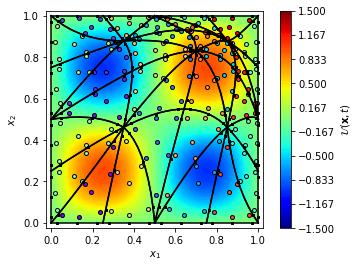

In [10]:
projection_solver.plot(plot_numerical=False, plot_exact=True, plot_nodes=True, geometry_resolution=10, 
                       u_range=[-1.5,1.5])

In [11]:
projection_solver.discretization.x_prime_omega[0]

array([[[0.13002995, 0.14699944],
        [0.01206621, 0.18615764]],

       [[0.13002995, 0.18157018],
        [0.01206621, 0.26908853]],

       [[0.16460068, 0.2046696 ],
        [0.0949971 , 0.28525622]],

       [[0.12796552, 0.16187319],
        [0.00711392, 0.22418147]],

       [[0.14834753, 0.19587401],
        [0.0560078 , 0.2826074 ]],

       [[0.14834753, 0.17549201],
        [0.0560078 , 0.23371352]],

       [[0.14155353, 0.17774641],
        [0.03970984, 0.24683413]]])

In [12]:
projection_solver.discretization.x_omega[0]

array([[0.05424987, 0.23528808, 0.29906092, 0.1365729 , 0.28340172,
        0.1616303 , 0.19262619],
       [0.03625011, 0.05304967, 0.36442038, 0.02626675, 0.23426618,
        0.18829204, 0.14873894]])

In [13]:
np.linalg.det(np.array([[ 1.25000000e-01,  1.75000000e-01],
        [-1.67602154e-17,  2.30850001e-01]]))

0.028856250125000014

In [14]:
projection_solver.discretization.J_omega[1]

array([0.025571  , 0.01855514, 0.02240567, 0.02220542, 0.02005635,
       0.02445708, 0.02227283])